In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
from scipy import sparse
%matplotlib inline

In [2]:
data = pd.read_csv('datasets/dataset.csv')
data.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [3]:
data.columns

Index(['user_id', 'number_of_ticks', 'date_created', 'chapter', 'book',
       'numberofentriesofbook', 'numberofusersofbook', 'product_manning_id',
       'user_owns_book'],
      dtype='object')

In [4]:
data.shape

(4999, 9)

In [5]:
data.sort_values(by=['user_id', 'date_created'], inplace=True)
data['source'] = data['book'] + data['chapter']
data['target'] = data['source'].shift(-1)
data['next_user'] = data['user_id'].shift(-1)
data['keep_edge'] = np.where((data['user_id'] == data['next_user']), True , np.nan)
data.dropna(subset=['keep_edge'], inplace=True)

In [6]:
data.shape

(4358, 13)

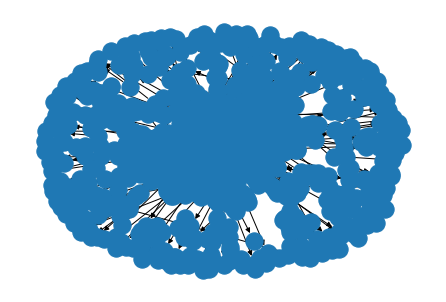

In [7]:
Graph1 = nx.from_pandas_edgelist(data, "source", "target", create_using=nx.DiGraph)
nx.draw(Graph1)